# TP1 KMEANS

On nous propose de coder l'algorithme des kmeans afin de faire du clustering sur 2 classes puis plus de 2 classes.
Plus tard, on utilisera notre algorithme pour segmenter une image sur l'information de couleur.

In [379]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

In [380]:
# mean = [1,2,3,4]
# sd = [0.25, 0.25, 0.1, 0.2]
clusters = 2
mean = np.random.randint(5, size=clusters)
sd = [0.25, 0.25, 0.3]
dim = 2
nb = 50
K= clusters

## Fonctions à utiliser pour le clustering

In [381]:
def gen_points(mean=1,sd=0.5, nb=100, dim=2, clusters=2):
    size = []
    # for i in range(0,dim):
    size.append(nb)
    size.append(dim)
    points = np.random.normal(mean[0],sd[0],size=size)
    for i in range(1,clusters):
        points = np.concatenate((points,np.random.normal(mean[i],sd[i],size=size)),axis=0)
    
    return points

In [382]:
def distance(points,Pc):   
    return scipy.spatial.distance.cdist(points[:,:], Pc[:,:])

In [383]:
def kmeans(points = [0,0], K = 1, nb=1, dim=2):
    # Initialisation K prototypes
    Pc_index = []
    Pc_save = np.zeros([K,dim])
    clusters = []
    iter = 0
    eps = 0.1

    for i in range(0,K):
        Pc_index.append(np.random.randint(0,nb*dim))
    Pc = points[Pc_index,:]

    while (np.mean(distance(Pc,Pc_save)) > eps and iter < 10):
        iter += 1
        Pc_save = Pc
        # print(Pc)
        # print(points[:,:Pc.shape[0]])
        dist = distance(points=points[:,:Pc.shape[0]],Pc=Pc)
        clust = np.argmin(dist, axis=1)
        clust = np.expand_dims(clust, axis=0)
        points = np.append(points[:,:Pc.shape[0]], clust.T, axis=1)
        # print(points)
        Pc = np.zeros([K,dim])
        index = np.array([])

        for n in range(0,2*nb):
            for k in range(0,K):
                index = np.append(index, (clust==k).sum())
                if points[n,-1] == k:
                    # print(points)
                    # print(Pc)
                    Pc[k,:] = np.add(Pc[k,:], points[n,:-1])

        for k in range(0,K):
            Pc[k,:] = np.divide(Pc[k,:],index[k])

        # print(Pc)
    return Pc, points


In [384]:
colors=['red', 'green','yellow','blue','purple', 'orange']
def visualisation(points, Pc=[0,0], dim=2, K=1):
    if(dim==2):
        for k in range(0,K):
            for n in range(0,len(points)):
                plt.plot(points[n,0], points[n,1], 'o', color=colors[int(points[n,-1])])
        plt.plot(Pc[:,0],Pc[:,1],'r+')
        plt.grid(True)
        plt.axis([min(mean)-1,max(mean)+1,min(mean)-1,max(mean)+1])

In [385]:
points = gen_points(mean,sd,nb,dim,clusters)
# print(points.shape)
# print(points.mean(axis=0))
# print(points)

In [386]:
dist = distance(points,points)
# print(dist)

In [387]:
Pc, clusters = kmeans(points,K=K,nb=nb,dim=dim)
# print(Pc)
# print(clusters)


[[ 2.00659379  2.0037594 ]
 [-0.05586229 -0.02372516]]
[0 2]


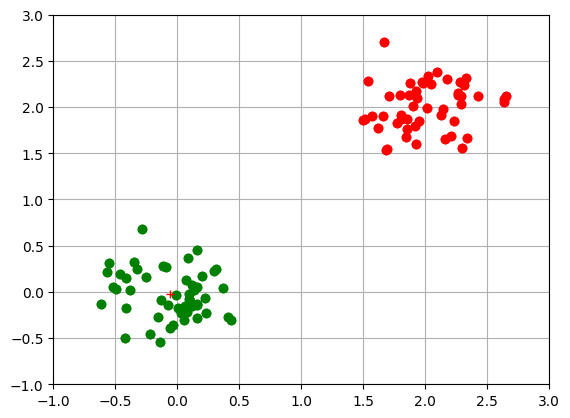

In [388]:
visualisation(clusters, Pc, dim=dim, K=K)
print(Pc)
print(mean)